Forecasting the amount of furniture sales in a store with the Arima algorithm

In [1]:
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['text.color'] = 'k'

In [2]:
data = pd.read_excel('Superstore.xls')
furniture = data.loc[data['Category'] == 'Furniture']
print('Minimum Date: ', furniture['Order Date'].min())
print('Maximum Date: ', furniture['Order Date'].max())

Minimum Date:  2014-01-06 00:00:00
Maximum Date:  2017-12-30 00:00:00


In [3]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

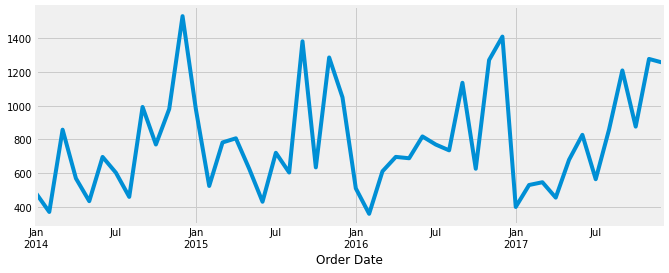

In [4]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
y = furniture['Sales'].resample('MS').mean()
y.plot(figsize=(10, 4))
plt.show()

In [5]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [6]:
for i in pdq:
    for j in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y, order=i, seasonal_order=j, enforce_stationarity=False, enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA {}x{}12 - AIC:{}'.format(i, j, results))

ARIMA (0, 0, 0)x(0, 0, 0, 12)12 - AIC:<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000233562ED240>
ARIMA (0, 0, 0)x(0, 0, 1, 12)12 - AIC:<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000023369F142E0>
ARIMA (0, 0, 0)x(0, 1, 0, 12)12 - AIC:<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000023369FC7AC0>
ARIMA (0, 0, 0)x(0, 1, 1, 12)12 - AIC:<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000023369F16E30>
ARIMA (0, 0, 0)x(1, 0, 0, 12)12 - AIC:<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000023369FC7A30>
ARIMA (0, 0, 0)x(1, 0, 1, 12)12 - AIC:<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000023369FC7700>
ARIMA (0, 0, 0)x(1, 1, 0, 12)12 - AIC:<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000023357684A90>
ARIMA (0, 0, 0)x(1, 1, 1, 12)12 - AIC:<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000023369

In [7]:
mod = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0949      0.313     -0.303      0.762      -0.708       0.518
ma.L1         -1.0000      0.415     -2.409      0.016      -1.814      -0.186
ar.S.L12      -0.0036      0.424     -0.008      0.993      -0.834       0.827
ma.S.L12      -0.3012      0.501     -0.601      0.548      -1.283       0.681
sigma2      2.476e+04   1.68e-05   1.48e+09      0.000    2.48e+04    2.48e+04


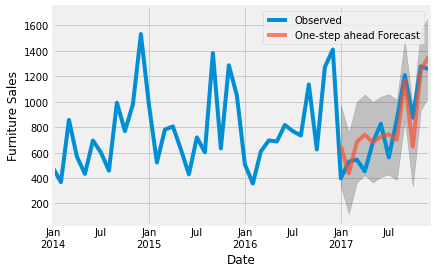

In [8]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [20]:
y_forcasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forcasted - y_truth) ** 2).mean()
acu = ((y_truth * 100) / y_forcasted).mean()
print('The mean squared error of our forcasts is: {}'.format(round(mse, 2)))
print('The root mean squared error of our forcasts is: {}'.format(round(np.sqrt(mse), 2)))
print('The Accuracy of Arima prediction method is: {}'.format(round(acu, 2)))

The mean squared error of our forcasts is: 25710.67
The root mean squared error of our forcasts is: 160.35
The Accuracy of Arima prediction method is: 97.38


In [10]:
furniture = data.loc[data['Category'] == 'Furniture']
office = data.loc[data['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

In [11]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()

furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date': y_furniture.index, 'Sales': y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)

store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


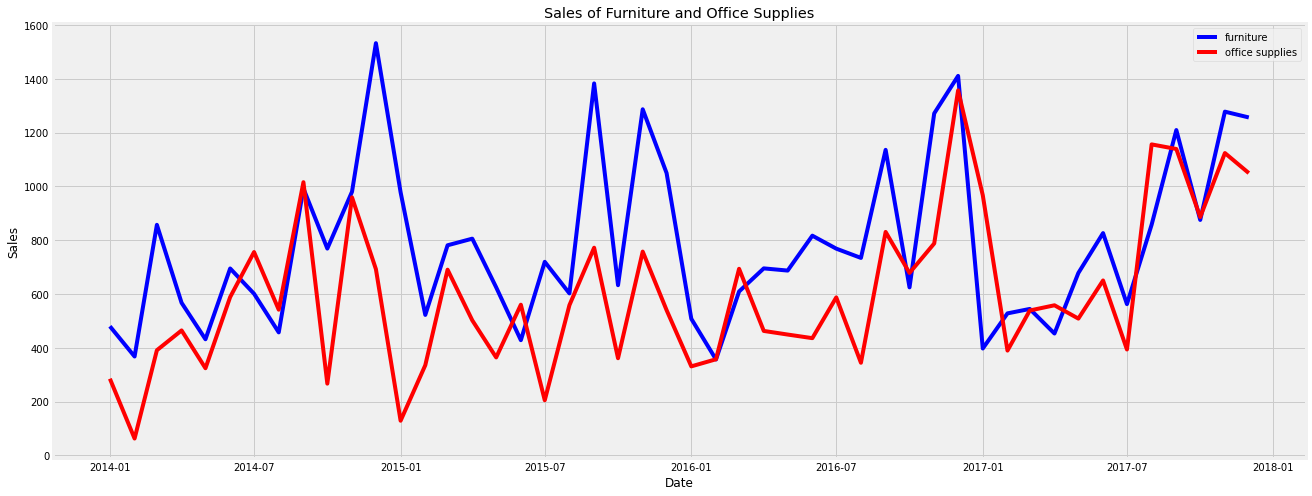

In [12]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label='furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label='office supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of Furniture and Office Supplies')
plt.legend()